In [1]:
import numpy as np
import matplotlib.tri
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

In [2]:
# Constants and parameters
k = 1.  # thermal conductivity

T_west=300.
T_east=300.
T_south=300.
T_north=400.

In [3]:
# importing the Delaunay grid generation #TODO


In [4]:
# generate the random points the domain including some boundary points

def generate_points_simple(domain, num_points, boundary_points):
    # Generate random interior points according to domain and num_points
    interior_points = np.random.rand(num_points, 2)
    #TODO
    
    # Generate boundary points according to domain and boundary_points
    x = np.linspace(domain[0], domain[1], boundary_points)
    y = np.linspace(domain[2], domain[3], boundary_points)
    
    # Bottom edge points
    bottom_edge = np.zeros((boundary_points, 2))
    bottom_edge[:, 0] = x
    bottom_edge[:, 1] = domain[2]
    
    # Top edge points
    #TODO
    
    # Left edge points
    left_edge = np.zeros((boundary_points, 2))
    #TODO
    
    # Right edge points
    right_edge = np.zeros((boundary_points, 2))
    right_edge[:, 0] = domain[1]
    right_edge[:, 1] = y
    
    # Combine all edge points
    edge_points = np.vstack([bottom_edge, top_edge, left_edge, right_edge])
    
    # Combine interior and edge points, and remove duplicates
    points = np.vstack([interior_points, edge_points])
    points = np.unique(points, axis=0)
    return points

In [5]:
domain = [0, 1, 0, 1]
points = generate_points_simple(domain, 400, 20)  # 400 interior, 20 along each boundary

# using the Delaunay2D class to generate the triangles and neighbors
#create a Delaunay class object #TODO
for p in points:
    #use addPoint method
triangles = delaunay.exportTriangles()
neighborsDict=delaunay.exportNeighborsDict()

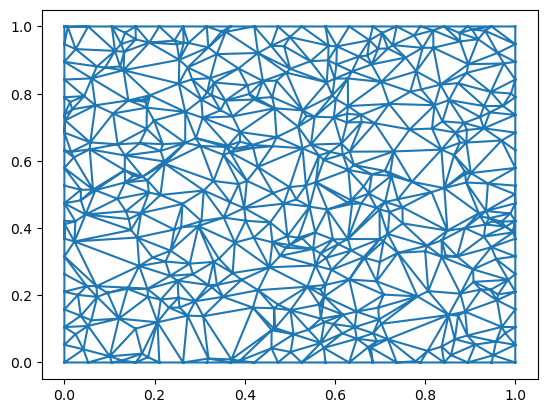

In [6]:
# plot the grod
plt.triplot(matplotlib.tri.Triangulation(points[:, 0], points[:, 1], triangles))

In [8]:
# Calculate centroids and areas of triangles
n_triangles = len(triangles)
centroids = np.zeros((n_triangles, 2))
areas = np.zeros(n_triangles)
for i, tri in enumerate(triangles):
    # triangles is a list of tuples
    # so, tri is a tuple and cannot be used as index to find the cell centers
    # we need to convert it to a list
    
    tri=list(tri)
    vertex_coords = points[tri]

    # define the coordinates of the vertices x0,y0,x1,y1,x2,y2
    #TODO
    #     
    # Shoelace formula for the area of a triangle
    areas[i] = 0.5 * abs(x0*y1 + x1*y2 + x2*y0 - y0*x1 - y1*x2 - y2*x0)

    centroids[i,0] = #TODO
    centroids[i,1] = #TODO

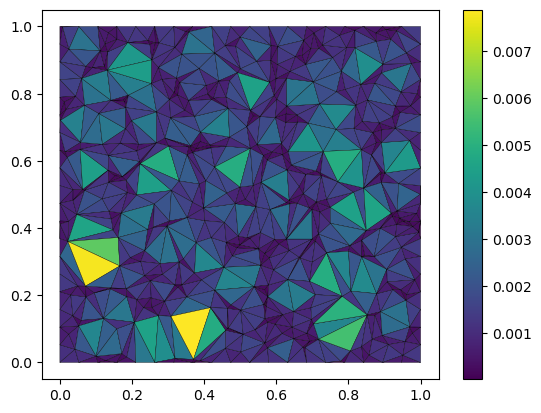

In [9]:
# plot the area
tcf = plt.tripcolor(points[:, 0], points[:, 1], triangles, facecolors=areas, edgecolors='k')
plt.colorbar(tcf)
plt.show()

In [10]:
# Construct the system matrices
#Define A as lil_matrix
#TODO
#Define b as a numpy array of zeros
#TODO

In [12]:
# Better version incorporating Phi_CR etc

boundary_tris=[]
# Finite volume method based on centroids
# First find out if a cell is at the boundary or not, i.e., has None values or not as the neighbors
# If it is, add it to the boundary_tris list and skip this loop's calculations
# If it is not, calculate the distance between the centroids of the two neighboring cells and add them to the A matrix
for i, tri in enumerate(triangles):
    neighbors = neighborsDict[tri]
    if None in neighbors:
        boundary_tris.append(tri)
        continue
    
    #Find the centroid of the current triangle
    Xc #TODO
    Yc #TODO
    for neighbor in neighbors:
        neighbor_id=triangles.index(neighbor) #TODO: should be pulled out of the loop and be done once
        
        #TODO: find the centroid of the neighbor
        Xn= #TODO
        Yn= #TODO
        
        #what edge is the neighbor on?
        iedge=neighborsDict[tri].index(neighbor)
        print("Common value between tri and neighbor:", tri,neighbor,iedge)

        #We should find the beginning and the end of this esge
        # which is iedge+1 and iedge-1 but also have to consider the case where iedge is 0 or 2 and the fact that the elements are defined CCW
        p1=tri[(iedge+1)%3]; x_p1,y_p1=#TODO # find the value associated with the point on the first side of iedge
        p2=tri[(iedge-1)%3]; x_p2,y_p2=#TODO # find the value associated with the point on the second side of iedge
        print("p1:",p1,"p2:",p2)
        
        dx_12=#TODO
        dy_12=#TODO

        dx_CN=#TODO
        dy_CN=#TODO

        Phi_CN=#TODO

        A[i, i] #TODO
        A[i, neighbor_id] -= k * Phi_CN * areas[i]

    if i==10: #just an example triangle
        print("i=",i,
        "\ntri:",tri,
        "\ntriangles[i]:",triangles[i],
        "\n neighbors:",neighbors,
        "\n neighbor:",neighbor, # one sample neighbor (the last one in the loop)
        # in the triangles list, what is the list index of this tuple called neighbor
        "\n neighbor_id:",triangles.index(neighbor),
        "\n neighbor_center:",centroids[neighbor_id])

Common value between tri and neighbor: (25, 23, 14) (23, 15, 14) 0
p1: 23 p2: 14
Common value between tri and neighbor: (25, 23, 14) (25, 14, 21) 1
p1: 14 p2: 25
Common value between tri and neighbor: (25, 23, 14) (36, 23, 25) 2
p1: 25 p2: 23
Common value between tri and neighbor: (25, 14, 21) (21, 14, 13) 0
p1: 14 p2: 21
Common value between tri and neighbor: (25, 14, 21) (47, 25, 21) 1
p1: 21 p2: 25
Common value between tri and neighbor: (25, 14, 21) (25, 23, 14) 2
p1: 25 p2: 14
Common value between tri and neighbor: (26, 24, 12) (24, 13, 12) 0
p1: 24 p2: 12
Common value between tri and neighbor: (26, 24, 12) (26, 12, 11) 1
p1: 12 p2: 26
Common value between tri and neighbor: (26, 24, 12) (42, 24, 26) 2
p1: 26 p2: 24
Common value between tri and neighbor: (27, 20, 7) (20, 8, 7) 0
p1: 20 p2: 7
Common value between tri and neighbor: (27, 20, 7) (27, 7, 6) 1
p1: 7 p2: 27
Common value between tri and neighbor: (27, 20, 7) (28, 20, 27) 2
p1: 27 p2: 20
Common value between tri and neighbor

In [13]:
for i,boundary_tri in enumerate(boundary_tris):
    eps=1e-5

    for iedge,edge in enumerate(neighborsDict[boundary_tri]): 
        print("iedge:",iedge,"edge:",edge)
        # neighbors list is a list of 3 tuples, each tuple is a triangle (specified by their vertexes)
        # iedge is 0,1, or 2
        # edge now shows the neighboring triangle that shares the `edge` with the cell `boundary_tri`

        # if edge==None, then the edge is a boundary edge
        if edge==None:
            #This mean that iedge is the boundary edge. We should find the beginning and the end of this esge
            # which is iedge+1 and iedge-1 but also have to consider the case where iedge is 0 or 2 and the fact that the elements are defined CCW
            p1=#TODO; x_p1,y_p1=points[p1] # find the value associated with the point on the front side of iedge
            p2=#TODO; x_p2,y_p2=points[p2] # find the value associated with the point on the back side of iedge

            triangle_id=triangles.index(boundary_tri) # find the index of this boundary triangle
            area=#TODO # find the area of this boundary triangle
            center=#TODO # find the centroid of this boundary triangle

            print("x_p1:",x_p1,"y_p1:",y_p1,"x_p2:",x_p2,"y_p2:",y_p2,"center:",center)
            
            dx_12=x_p2-x_p1
            dy_12=y_p2-y_p1

            x_I=(x_p1+x_p2)/2.
            y_I=(y_p1+y_p2)/2.

            dx_CI=x_I-center[0]
            dy_CI=y_I-center[1]


            Phi_CI=(dx_CI*dy_12-dy_CI*dx_12)/(dx_CI**2+dy_CI**2)

            #which boundary do p1 and p2 belong to?
            if np.abs(x_I-domain[0])<eps: T_I=T_west
            if np.abs(x_I-domain[1])<eps: T_I=T_east
            if np.abs(y_I-domain[2])<eps: T_I=T_south
            if np.abs(y_I-domain[3])<eps: T_I=T_north

            A[triangle_id, triangle_id] #TODO
            b[triangle_id] += k*T_I*Phi_CI/1. #* area Maybe?

iedge: 0 edge: None
x_p1: 0.0 y_p1: 0.42105263157894735 x_p2: 0.0 y_p2: 0.3684210526315789 center: [1.98931108e-04 4.00291987e-01]
iedge: 1 edge: (27, 20, 7)
iedge: 2 edge: (28, 8, 20)
iedge: 0 edge: None
x_p1: 0.0 y_p1: 0.7368421052631579 x_p2: 0.0 y_p2: 0.6842105263157894 center: [5.73039081e-04 7.13892934e-01]
iedge: 1 edge: (43, 21, 13)
iedge: 2 edge: (25, 14, 21)
iedge: 0 edge: None
x_p1: 0.0 y_p1: 1.0 x_p2: 0.0 y_p2: 0.9473684210526315 center: [0.00254159 0.98198286]
iedge: 1 edge: (30, 22, 18)
iedge: 2 edge: (41, 19, 22)
iedge: 0 edge: None
x_p1: 0.0 y_p1: 0.7894736842105263 x_p2: 0.0 y_p2: 0.7368421052631579 center: [0.00416214 0.76717945]
iedge: 1 edge: (25, 23, 14)
iedge: 2 edge: (36, 15, 23)
iedge: 0 edge: None
x_p1: 0.0 y_p1: 0.6842105263157894 x_p2: 0.0 y_p2: 0.631578947368421 center: [0.00493453 0.64753312]
iedge: 1 edge: (26, 24, 12)
iedge: 2 edge: (43, 13, 24)
iedge: 0 edge: None
x_p1: 0.0 y_p1: 0.631578947368421 x_p2: 0.0 y_p2: 0.5789473684210527 center: [0.0069425  0.

In [ ]:
# Solve the linear system for T
T #TODO

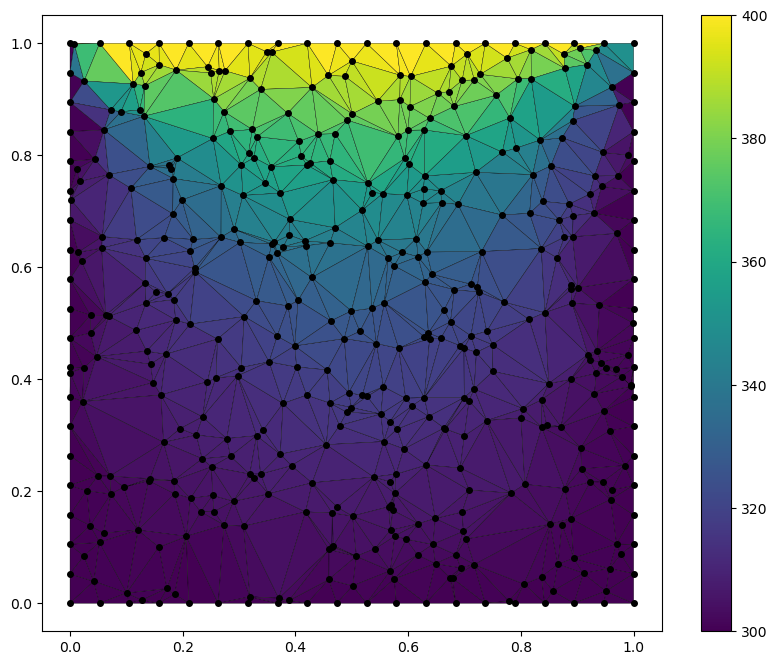

In [14]:
# Visualization
plt.figure(figsize=(10, 8))
tcf = plt.tripcolor(points[:, 0], points[:, 1], triangles, facecolors=T, edgecolors='k')
plt.colorbar(tcf)
plt.plot(points[:, 0], points[:, 1], 'ko', markersize=4)
plt.show()